In [27]:
!pip install pandas numpy matplotlib scikit-learn seaborn -q

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline  

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

from sklearn import model_selection 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn import metrics  
from sklearn.feature_selection import SelectFromModel, RFECV

In [52]:
featurs = ['Batt_name', 'cycle','Voltage_measured','Current_measured','Temperature_measured','Current_charge','Voltage_charge','Time','Capacity']

In [53]:
df = pd.read_csv('/home/workspace/data/combined_discharge.csv')
df.head()

,Batt_name,cycle,type,ambient_temperature,time,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Capacity
0,B0005,2,discharge,24,[2.0080e+03 4.0000e+00 2.0000e+00 1.5000e+01 2...,4.191492,0.004902,24.330034,0.0006,0.000,0.000,1.856487
1,B0005,2,discharge,24,[2.0080e+03 4.0000e+00 2.0000e+00 1.5000e+01 2...,4.190749,0.001478,24.325993,0.0006,4.206,16.781,1.856487
2,B0005,2,discharge,24,[2.0080e+03 4.0000e+00 2.0000e+00 1.5000e+01 2...,3.974871,2.012528,24.389085,1.9982,3.062,35.703,1.856487
3,B0005,2,discharge,24,[2.0080e+03 4.0000e+00 2.0000e+00 1.5000e+01 2...,3.951717,2.013979,24.544752,1.9982,3.030,53.781,1.856487
4,B0005,2,discharge,24,[2.0080e+03 4.0000e+00 2.0000e+00 1.5000e+01 2...,3.934352,2.011144,24.731385,1.9982,3.011,71.922,1.856487


In [54]:
df = df[featurs]
df.head()

,Batt_name,cycle,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Capacity
0,B0005,2,4.191492,0.004902,24.330034,0.0006,0.000,0.000,1.856487
1,B0005,2,4.190749,0.001478,24.325993,0.0006,4.206,16.781,1.856487
2,B0005,2,3.974871,2.012528,24.389085,1.9982,3.062,35.703,1.856487
3,B0005,2,3.951717,2.013979,24.544752,1.9982,3.030,53.781,1.856487
4,B0005,2,3.934352,2.011144,24.731385,1.9982,3.011,71.922,1.856487


In [77]:
X = df.iloc[:,:-1]
y = df.iloc[:, 8]

In [118]:
df['cycle'].unique()

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  25,  27,
        29,  31,  33,  35,  37,  39,  42,  46,  50,  54,  58,  62,  66,
        70,  74,  78,  82,  86,  90,  94,  98, 102, 106, 110, 114, 118,
       122, 126, 130, 134, 136, 140, 144, 148, 150, 154, 158, 162, 166,
       170, 174, 178, 182, 186, 190, 194, 198, 202, 206, 210, 214, 216,
       220, 224, 228, 232, 236, 240, 244, 248, 252, 256, 260, 264, 266,
       270, 274, 278, 282, 286, 290, 294, 298, 302, 306, 310, 313, 316,
       320, 324, 328, 332, 336, 340, 344, 348, 352, 356, 360, 364, 367,
       371, 375, 379, 383, 387, 391, 395, 399, 403, 407, 411, 415, 419,
       423, 427, 431, 433, 437, 441, 445, 449, 453, 457, 461, 465, 469,
       473, 477, 481, 483, 485, 489, 493, 497, 501, 505, 509, 513, 517,
       521, 525, 529, 533, 537, 541, 545, 548, 552, 556, 560, 564, 568,
       572, 576, 580, 584, 588, 592, 596, 600, 604, 608, 612, 614,  23,
        41,  43,  47,  51,  53,  55,  57,  59,  68,  72])

In [ ]:
cycle_counts = df['cycle'].value_counts().sort_index()

cycle_counts_less_than_90 = cycle_counts[cycle_counts.index <= 90]
cycle_counts_greater_than_90 = cycle_counts[cycle_counts.index > 90]

print("Cycles <= 90:")
print(cycle_counts_less_than_90)
print(cycle_counts_less_than_90.sum())



Cycles <= 90:
cycle
2       591
4      3152
6      3133
8      3106
10     3082
       ... 
306     978
310     975
313    1017
316     987
320     984
Name: count, Length: 103, dtype: int64
145656


In [131]:
print("\nCycles > 90:")
print(cycle_counts_greater_than_90)
print(cycle_counts_greater_than_90.sum())


Cycles > 90:
cycle
324    981
328    978
332    975
336    972
340    972
      ... 
600    891
604    891
608    891
612    894
614    900
Name: count, Length: 76, dtype: int64
70551


In [120]:
for cycle in df['cycle'].unique():
    print(cycle)

2
4
6
8
10
12
14
16
18
20
22
25
27
29
31
33
35
37
39
42
46
50
54
58
62
66
70
74
78
82
86
90
94
98
102
106
110
114
118
122
126
130
134
136
140
144
148
150
154
158
162
166
170
174
178
182
186
190
194
198
202
206
210
214
216
220
224
228
232
236
240
244
248
252
256
260
264
266
270
274
278
282
286
290
294
298
302
306
310
313
316
320
324
328
332
336
340
344
348
352
356
360
364
367
371
375
379
383
387
391
395
399
403
407
411
415
419
423
427
431
433
437
441
445
449
453
457
461
465
469
473
477
481
483
485
489
493
497
501
505
509
513
517
521
525
529
533
537
541
545
548
552
556
560
564
568
572
576
580
584
588
592
596
600
604
608
612
614
23
41
43
47
51
53
55
57
59
68
72


In [ ]:
train_mask = df['cycle'] <= 90 
test_mask = (df['cycle'] > 90) & (df['Batt_name'] == "B0005")

X_train = X[train_mask]        
y_train = y[train_mask]        

X_test = X[test_mask]          
y_test = y[test_mask]          


In [133]:
from sklearn.preprocessing import LabelEncoder
labelEconder = LabelEncoder()
X_train.iloc[:,0] = labelEconder.fit_transform(X_train.iloc[:,0])
X_test.iloc[:,0] = labelEconder.fit_transform(X_test.iloc[:,0])

In [134]:
def get_regression_metrics(model, actual, predicted):
    
    """Calculate main regression metrics.
    
    Args:
        model (str): The model name identifier
        actual (series): Contains the test label values
        predicted (series): Contains the predicted values
        
    Returns:
        dataframe: The combined metrics in single dataframe
    
    
    """
    regr_metrics = {
                        'Root Mean Squared Error' : metrics.mean_squared_error(actual, predicted)**0.5,
                        'Mean Absolute Error' : metrics.mean_absolute_error(actual, predicted),
                        'R^2' : metrics.r2_score(actual, predicted),
                        'Explained Variance' : metrics.explained_variance_score(actual, predicted)
                   }

    #return reg_metrics
    df_regr_metrics = pd.DataFrame.from_dict(regr_metrics, orient='index')
    df_regr_metrics.columns = [model]
    return df_regr_metrics

In [62]:
def get_adj_R(ytest,ypre,xtest):
    SS_Residual = sum((ytest-ypre)**2)
    SS_Total = sum((ytest-np.mean(ytest))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1)
    return("The R^2 is "+str(r_squared)+"   The Adjusted R^2 is "+str(adjusted_r_squared))

### Linear Regression: 
statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line or hyperplane

In [63]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [135]:
y_pred = linreg.predict(X_test)
y_train_pred = linreg.predict(X_train)

/usr/local/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [136]:
print('R^2 training: %.3f, R^2 test: %.3f' % (
      (metrics.r2_score(y_train, y_train_pred)), 
      (metrics.r2_score(y_test, y_pred))))

linreg_metrics = get_regression_metrics('Linear Regression', y_test, y_pred)
linreg_metrics

SS_Residual = sum((y_test-y_pred)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total

adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("The R^2 is "+str(r_squared)+"   The Adjusted R^2 is "+str(adjusted_r_squared))

print(get_adj_R(y_test,y_pred,X_test))

R^2 training: 0.272, R^2 test: -14.039
The R^2 is -14.038946991846183   The Adjusted R^2 is -14.044064891111741
The R^2 is -14.038946991846183   The Adjusted R^2 is -14.044064891111741


In [137]:
X = df.iloc[:,:-1]
y = df.iloc[:, 8]

In [138]:
y_pred

array([1.76244185, 1.74303921, 1.73862566, ..., 1.60710726, 1.60857026,
       1.60895315], shape=(23517,))

In [139]:
y_train_pred

array([1.92166665, 1.90605737, 1.90132753, ..., 1.7195952 , 1.70994492,
       1.70594661], shape=(145656,))

In [140]:
X_test

,Batt_name,cycle,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time
26768,0,324,4.198353,0.000059,24.501974,0.0006,0.000,0.000
26769,0,324,4.197709,0.001550,24.494141,0.0006,4.213,9.422
26770,0,324,3.996088,2.014361,24.524344,1.9982,2.970,19.578
26771,0,324,3.977966,2.011995,24.580800,1.9982,2.953,28.906
26772,0,324,3.963654,2.013198,24.664233,1.9982,2.949,38.250
...,...,...,...,...,...,...,...,...
50280,0,614,3.579262,0.001569,34.864823,0.0006,0.000,2781.312
50281,0,614,3.581964,0.003067,34.814770,0.0006,0.000,2791.062
50282,0,614,3.584484,0.003079,34.676258,0.0006,0.000,2800.828
50283,0,614,3.587336,0.001219,34.565580,0.0006,0.000,2810.640


In [141]:
y_pred_df = pd.DataFrame({
    'cycle': X_test['cycle'],  
    'pred': y_pred         
})

In [142]:
print(X_train.shape)

(145656, 8)


In [143]:
X_train.head(1)

,Batt_name,cycle,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time
0,0,2,4.191492,0.004902,24.330034,0.0006,0.0,0.0


In [144]:
y_train_pred.shape

(145656,)

In [145]:
import pandas as pd

y_train_pred_df = pd.DataFrame({
    'cycle': X_train['cycle'],  
    'train_pred': y_train_pred        
})

Text(0.5, 1.0, 'Discharge B0005')

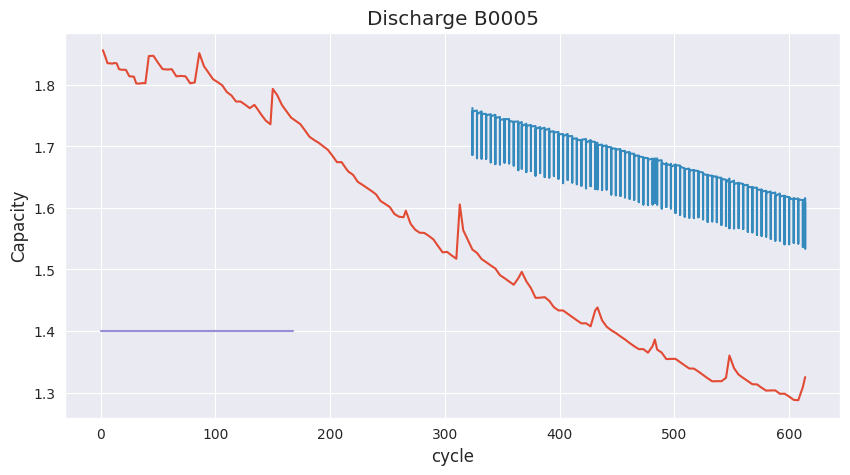

In [146]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = df.loc[(df['cycle']>=1)&(df['Batt_name']=="B0005"),['cycle','Capacity']]
plot_pre = y_pred_df.loc[y_pred_df['cycle']>=90,['cycle','pred']]
# plot_per = y_train_pred_df.loc[y_train_pred_df['cycle']>=90,['cycle','train_pred']]


sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
plt.plot(plot_df['cycle'], plot_df['Capacity'])
plt.plot(plot_pre['cycle'],plot_pre['pred'])
# plt.plot(plot_per['cycle'],plot_per['train_pred'])


plt.plot([0.,168], [1.4, 1.4])
plt.ylabel('Capacity')

adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

In [147]:
print("Capacity_predict=======Actual value======difference")
for i in range(len(y_pred)):
    print(str(y_pred[i])+"     "+ str(y_test.iloc[i]) +"    "+str(y_test.iloc[i]-y_pred[i]))

Capacity_predict=======Actual value======difference
1.762441848671608     1.53237556    -0.23006628867160805
1.7430392071749161     1.53237556    -0.21066364717491615
1.7386256602010057     1.53237556    -0.20625010020100576
1.7389625353849636     1.53237556    -0.20658697538496362
1.737005200146083     1.53237556    -0.20462964014608298
1.736547181940632     1.53237556    -0.204171621940632
1.7353682329221656     1.53237556    -0.2029926729221656
1.7362176920101822     1.53237556    -0.2038421320101822
1.7348780156655674     1.53237556    -0.20250245566556746
1.7352588295743427     1.53237556    -0.20288326957434277
1.7333643631227937     1.53237556    -0.20098880312279377
1.7350520034482642     1.53237556    -0.2026764434482642
1.7348741281450493     1.53237556    -0.2024985681450493
1.7349782155449438     1.53237556    -0.20260265554494383
1.7332112588547754     1.53237556    -0.20083569885477548
1.7336957642296036     1.53237556    -0.20132020422960362
1.7340523889891393     1.5323